In [1]:
# install.packages("tidymodels")
# install.packages("infer")
suppressPackageStartupMessages(library(tidyverse))
suppressPackageStartupMessages(library(tidymodels))
suppressPackageStartupMessages(library(repr))
suppressPackageStartupMessages(library(infer))
suppressPackageStartupMessages(library(GGally))
options(repr.matrix.max.rows = 6)
options(repr.plot.width = 6, repr.plot.height = 6)
set.seed(100)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”


# Climate Change: Study temperature and precipitation in historical vs contemporary weather records   
**STAT 201  Project Proposal - Group 17  
Date:         March 03, 2022**

## Introduction

Climate change refers to long-term shifts in temperatures and weather patterns (United Nations, n.d.-b). Although the main cause for climate change varies from the rising concentration of greenhouse gases in the atmosphere to periodical change in solar activities and remains controversial, the effects of climate change are more universally observed. United Nations (n.d.-a) summarizes the effects of climate change as: hotter temperatures, more severe storms, increased drought, etc. We intend to obtain data from a Canadian weather station and to study the presence of these effects of climate change from some historical years to the present.  

The Canadian Climate and Weather Database provides weather records from numerous weather stations across Canada. Each weather station contains weather records in hourly, daily, and monthly formats. In order to obtain a meaningful and relatively large time span, the group queried stations with data available between 1950 and 2022. The query returned 8796 weather stations, from which, we randomly selected **ABBOTSFORD A** weather station in BC to use for this study (Historical Data, 2021, November 25).  

We intend to choose daily temperature and precipitation as the random variable 
Our data are under two categories - historical vs contemporary. For temperature, the random variable is daily temperature, and we want to study the parameter mean. We believe this can aid us to study the claimed effect of hotter temperature. For precipitation, the random variable is yearly maximum rainfall. We also study the parameter mean and hope to study another claimed effect of increased drought (United Nations, n.d.-a). Thus, this project aims to answer:

> Is there a significant difference in the weather record of the 1950s and the 2000s in terms of temperature and rainfall? 


## Method

Table 1 summarizes the abbreviation used in this report: 

| Abbreviation    | Parameter 
| :----------: | :---------- 
| $\mu_{ct}$ | mean of the contemporary daily mean temperature | 
| $\mu_{ht}$ | mean of the historical daily mean temperature | 
| $\mu_{cr}$ | mean of the contemporary yearly maximum rainfall | 
| $\mu_{ht}$ | mean of the historical yearly maximum rainfall | 
| $\bar{x}_{ct}$ | sample mean of the contemporary daily mean temperature | 
| $\bar{x}_{ht}$ | sample mean of the historical daily mean temperature | 
| $\bar{x}_{cr}$ | sample mean of the contemporary yearly maximum rainfall | 
| $\bar{x}_{ht}$ | sample mean of the historical yearly maximum rainfall | 

<center><i>Table 1. Table of abbreviation.</i>  

The first hypothesis we test is:  
**Test Statistic**: The difference in sample mean $\bar{x}_{ct} - \bar{x}_{ht}$  
**Null Hypothesis**: The difference in population mean of the contemporary daily mean temperature and the historical daily mean temperature is the same.   
**Alternative Hypothesis**: The difference in population mean of the contemporary daily mean temperature and the historical daily mean temperature is not the same.   
  
$$H_0^{1}: \mu_{ct} - \mu_{ht} = 0$$  
  
$$H_A^{1}: \mu_{ct} - \mu_{ht} \neq 0$$

The second hypothesis we test is:  
**Test Statistic**: The difference in sample mean  $\bar{x}_{cr} - \bar{x}_{hr}$  
**Null Hypothesis**: The difference in population mean of the contemporary maximum yearly rainfall and the historical maximum yearly rainfall is the same.     
**Alternative Hypothesis**: The difference in population mean of the contemporary maximum yearly rainfall and the historical maximum yearly rainfall is not the same.    
  
$$H_0^{2}: \mu_{cr} - \mu_{hr} = 0$$  
  
$$H_A^{2}: \mu_{cr} - \mu_{hr} \neq 0$$

We test the hypotheses in two ways: bootstrap simulation and asymptotic two sample t-test and choose a significant value of $\alpha$ = 0.05 as a standard value in the statistics field. 

## Results

### Data Importing, Cleaning, and Wrangling
  
We first downloaded and imported daily data from 1950 to 1969 and 2000 to 2019.

In [2]:
climate_1950 <- read_csv("https://raw.githubusercontent.com/yxing6/STAT201-GroupProject-Climate/main/Data/en_climate_daily_BC_1100030_1950_P1D.csv", show_col_types = FALSE)
climate_1951 <- read_csv("https://raw.githubusercontent.com/yxing6/STAT201-GroupProject-Climate/main/Data/en_climate_daily_BC_1100030_1951_P1D.csv", show_col_types = FALSE)
climate_1952 <- read_csv("https://raw.githubusercontent.com/yxing6/STAT201-GroupProject-Climate/main/Data/en_climate_daily_BC_1100030_1952_P1D.csv", show_col_types = FALSE)
climate_1953 <- read_csv("https://raw.githubusercontent.com/yxing6/STAT201-GroupProject-Climate/main/Data/en_climate_daily_BC_1100030_1953_P1D.csv", show_col_types = FALSE)
climate_1954 <- read_csv("https://raw.githubusercontent.com/yxing6/STAT201-GroupProject-Climate/main/Data/en_climate_daily_BC_1100030_1954_P1D.csv", show_col_types = FALSE)
climate_1955 <- read_csv("https://raw.githubusercontent.com/yxing6/STAT201-GroupProject-Climate/main/Data/en_climate_daily_BC_1100030_1955_P1D.csv", show_col_types = FALSE)
climate_1956 <- read_csv("https://raw.githubusercontent.com/yxing6/STAT201-GroupProject-Climate/main/Data/en_climate_daily_BC_1100030_1956_P1D.csv", show_col_types = FALSE)
climate_1957 <- read_csv("https://raw.githubusercontent.com/yxing6/STAT201-GroupProject-Climate/main/Data/en_climate_daily_BC_1100030_1957_P1D.csv", show_col_types = FALSE)
climate_1958 <- read_csv("https://raw.githubusercontent.com/yxing6/STAT201-GroupProject-Climate/main/Data/en_climate_daily_BC_1100030_1958_P1D.csv", show_col_types = FALSE)
climate_1959 <- read_csv("https://raw.githubusercontent.com/yxing6/STAT201-GroupProject-Climate/main/Data/en_climate_daily_BC_1100030_1959_P1D.csv", show_col_types = FALSE)
climate_1960 <- read_csv("https://raw.githubusercontent.com/yxing6/STAT201-GroupProject-Climate/main/Data/en_climate_daily_BC_1100030_1960_P1D.csv", show_col_types = FALSE)
climate_1961 <- read_csv("https://raw.githubusercontent.com/yxing6/STAT201-GroupProject-Climate/main/Data/en_climate_daily_BC_1100030_1961_P1D.csv", show_col_types = FALSE)
climate_1962 <- read_csv("https://raw.githubusercontent.com/yxing6/STAT201-GroupProject-Climate/main/Data/en_climate_daily_BC_1100030_1962_P1D.csv", show_col_types = FALSE)
climate_1963 <- read_csv("https://raw.githubusercontent.com/yxing6/STAT201-GroupProject-Climate/main/Data/en_climate_daily_BC_1100030_1963_P1D.csv", show_col_types = FALSE)
climate_1964 <- read_csv("https://raw.githubusercontent.com/yxing6/STAT201-GroupProject-Climate/main/Data/en_climate_daily_BC_1100030_1964_P1D.csv", show_col_types = FALSE)
climate_1965 <- read_csv("https://raw.githubusercontent.com/yxing6/STAT201-GroupProject-Climate/main/Data/en_climate_daily_BC_1100030_1965_P1D.csv", show_col_types = FALSE)
climate_1966 <- read_csv("https://raw.githubusercontent.com/yxing6/STAT201-GroupProject-Climate/main/Data/en_climate_daily_BC_1100030_1966_P1D.csv", show_col_types = FALSE)
climate_1967 <- read_csv("https://raw.githubusercontent.com/yxing6/STAT201-GroupProject-Climate/main/Data/en_climate_daily_BC_1100030_1967_P1D.csv", show_col_types = FALSE)
climate_1968 <- read_csv("https://raw.githubusercontent.com/yxing6/STAT201-GroupProject-Climate/main/Data/en_climate_daily_BC_1100030_1968_P1D.csv", show_col_types = FALSE)
climate_1969 <- read_csv("https://raw.githubusercontent.com/yxing6/STAT201-GroupProject-Climate/main/Data/en_climate_daily_BC_1100030_1969_P1D.csv", show_col_types = FALSE)

climate_2000 <- read_csv("https://raw.githubusercontent.com/yxing6/STAT201-GroupProject-Climate/main/Data/en_climate_daily_BC_1100030_2000_P1D.csv", show_col_types = FALSE)
climate_2001 <- read_csv("https://raw.githubusercontent.com/yxing6/STAT201-GroupProject-Climate/main/Data/en_climate_daily_BC_1100030_2001_P1D.csv", show_col_types = FALSE)
climate_2002 <- read_csv("https://raw.githubusercontent.com/yxing6/STAT201-GroupProject-Climate/main/Data/en_climate_daily_BC_1100030_2002_P1D.csv", show_col_types = FALSE)
climate_2003 <- read_csv("https://raw.githubusercontent.com/yxing6/STAT201-GroupProject-Climate/main/Data/en_climate_daily_BC_1100030_2003_P1D.csv", show_col_types = FALSE)
climate_2004 <- read_csv("https://raw.githubusercontent.com/yxing6/STAT201-GroupProject-Climate/main/Data/en_climate_daily_BC_1100030_2004_P1D.csv", show_col_types = FALSE)
climate_2005 <- read_csv("https://raw.githubusercontent.com/yxing6/STAT201-GroupProject-Climate/main/Data/en_climate_daily_BC_1100030_2005_P1D.csv", show_col_types = FALSE)
climate_2006 <- read_csv("https://raw.githubusercontent.com/yxing6/STAT201-GroupProject-Climate/main/Data/en_climate_daily_BC_1100030_2006_P1D.csv", show_col_types = FALSE)
climate_2007 <- read_csv("https://raw.githubusercontent.com/yxing6/STAT201-GroupProject-Climate/main/Data/en_climate_daily_BC_1100030_2007_P1D.csv", show_col_types = FALSE)
climate_2008 <- read_csv("https://raw.githubusercontent.com/yxing6/STAT201-GroupProject-Climate/main/Data/en_climate_daily_BC_1100030_2008_P1D.csv", show_col_types = FALSE)
climate_2009 <- read_csv("https://raw.githubusercontent.com/yxing6/STAT201-GroupProject-Climate/main/Data/en_climate_daily_BC_1100030_2009_P1D.csv", show_col_types = FALSE)
climate_2010 <- read_csv("https://raw.githubusercontent.com/yxing6/STAT201-GroupProject-Climate/main/Data/en_climate_daily_BC_1100030_2010_P1D.csv", show_col_types = FALSE)
climate_2011 <- read_csv("https://raw.githubusercontent.com/yxing6/STAT201-GroupProject-Climate/main/Data/en_climate_daily_BC_1100030_2011_P1D.csv", show_col_types = FALSE)
climate_2012 <- read_csv("https://raw.githubusercontent.com/yxing6/STAT201-GroupProject-Climate/main/Data/en_climate_daily_BC_1100030_2012_P1D.csv", show_col_types = FALSE)
climate_2012_2 <- read_csv("https://raw.githubusercontent.com/yxing6/STAT201-GroupProject-Climate/main/Data/en_climate_daily_BC_1100031_2012_P1D_2.csv", show_col_types = FALSE)
climate_2013 <- read_csv("https://raw.githubusercontent.com/yxing6/STAT201-GroupProject-Climate/main/Data/en_climate_daily_BC_1100031_2013_P1D.csv", show_col_types = FALSE)
climate_2014 <- read_csv("https://raw.githubusercontent.com/yxing6/STAT201-GroupProject-Climate/main/Data/en_climate_daily_BC_1100031_2014_P1D.csv", show_col_types = FALSE)
climate_2015 <- read_csv("https://raw.githubusercontent.com/yxing6/STAT201-GroupProject-Climate/main/Data/en_climate_daily_BC_1100031_2015_P1D.csv", show_col_types = FALSE)
climate_2016 <- read_csv("https://raw.githubusercontent.com/yxing6/STAT201-GroupProject-Climate/main/Data/en_climate_daily_BC_1100031_2016_P1D.csv", show_col_types = FALSE)
climate_2017 <- read_csv("https://raw.githubusercontent.com/yxing6/STAT201-GroupProject-Climate/main/Data/en_climate_daily_BC_1100031_2017_P1D.csv", show_col_types = FALSE)
climate_2018 <- read_csv("https://raw.githubusercontent.com/yxing6/STAT201-GroupProject-Climate/main/Data/en_climate_daily_BC_1100031_2018_P1D.csv", show_col_types = FALSE)
climate_2019 <- read_csv("https://raw.githubusercontent.com/yxing6/STAT201-GroupProject-Climate/main/Data/en_climate_daily_BC_1100031_2019_P1D.csv", show_col_types = FALSE)


Next, we combined the yearly data and mutated a column to indicate the recorded time. The data in the 1950-1969 are labeled as `historical` and 2000-2019 as `contemporary`. We further combined these two data frames to serve as the raw sample for this study.
      
The raw sample contains 31 variables of weather measurements in which we decided to use the following as our possible parameters: 
- `Year`: the year of the weather record 
- `Max Temp`: the maximum temperature of the day in degrees Celsius.
- `Min Temp`: the minimum temperature of the day in degrees Celsius.
- `Mean Temp`: average temperature of the day in degrees Celsius.
- `Total Rain`: total amount of rain of the day measured in millimetres.
- `Total Precip`: total amount of precipitation of the day measured in millimetres. 

The following codes demonstrate the steps of data cleaning and wrangling:

In [60]:
climate_historical <- 
    rbind(climate_1950, climate_1951, climate_1952, climate_1953, climate_1954, climate_1955, climate_1956, climate_1957, climate_1958, climate_1959, 
          climate_1960, climate_1961, climate_1962, climate_1963, climate_1964, climate_1965, climate_1966, climate_1967, climate_1968, climate_1969) %>%
    mutate(Category = as.factor("historical"))

climate_contemporary <- 
    rbind(climate_2000, climate_2001, climate_2002, climate_2003, climate_2004, climate_2005, climate_2006, climate_2007, climate_2008, climate_2009,
          climate_2010, climate_2011, climate_2012, climate_2012_2, climate_2013, climate_2014, climate_2015, climate_2016, climate_2017, climate_2018, climate_2019) %>%
    mutate(Category = as.factor("contemporary"))

climate_merge <- rbind(climate_historical, climate_contemporary) 

climate_sample <- climate_merge %>%
    select(Year, "Max Temp (°C)", "Min Temp (°C)", 
           "Mean Temp (°C)", "Total Rain (mm)", "Total Precip (mm)", Category) %>%
    rename("Max_Temp" = "Max Temp (°C)",
           "Min_Temp" = "Min Temp (°C)",
           "Mean_Temp" = "Mean Temp (°C)",
           "Total_Rain" = "Total Rain (mm)",
           "Total_Precip" = "Total Precip (mm)") %>%
    na.omit()

climate_sample

Year,Max_Temp,Min_Temp,Mean_Temp,Total_Rain,Total_Precip,Category
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1950,-2.2,-9.4,-5.8,0,2.5,historical
1950,-11.1,-15.6,-13.4,0,0.0,historical
1950,-11.1,-17.2,-14.2,0,3.8,historical
⋮,⋮,⋮,⋮,⋮,⋮,⋮
2019,9.6,3.3,6.5,0.0,0.0,contemporary
2019,8.1,4.3,6.2,3.4,3.4,contemporary
2019,11.1,6.0,8.6,39.9,39.9,contemporary


*Table 2. Table of sample weather record at Abbotsford A weather station.*

## Temperature

The United Nations (n.d.-a) states that the temperature in the recent decade is higher than last century. Is there enough evidence to support this claim? Can we see this claimed difference in `Mean_Temp` between historical and contemporary data in the sample weather records from the Abbotsford A weather station? We first subset the variable `Mean_Temp` and start to answer this question with a box plot.

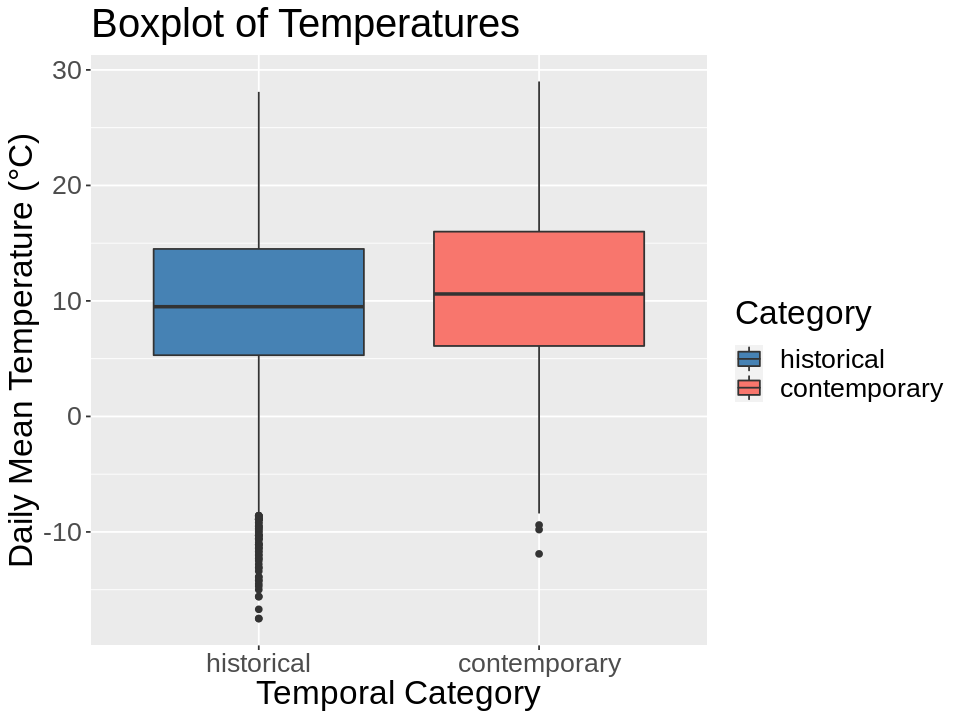

In [80]:
options(repr.plot.width = 8, repr.plot.height = 6)

station_temp <- climate_sample %>%
    filter(!is.na(Mean_Temp)) %>%
    select(Mean_Temp, Category)
# station_temp

temp_boxplot <- station_temp %>%
    ggplot(aes(x = Category, y = Mean_Temp, fill = Category)) +
    geom_boxplot() +
    scale_fill_manual(values = c("#4682B4", "#F8766D")) +
    labs(x = "Temporal Category", y = "Daily Mean Temperature (°C)") +
    ggtitle("Boxplot of Temperatures") +
    theme(text = element_text(size = 20))
temp_boxplot



*Figure 1. Boxplot of daily mean temperature at Abbotsford A weather station*

From this boxplot, we can observe that there is a small difference in the median of daily `Mean_Temp` between the historical and contemporary weather records. However, is there a ***real*** difference in the mean of the daily temperature? We answer the question by perform a hypothesis test:    
  
$$H_0^{1}: \mu_{ct} - \mu_{ht} = 0$$  
  
$$H_A^{1}: \mu_{ct} - \mu_{ht} \neq 0$$
  
We begin by visualize the sample distribution. 

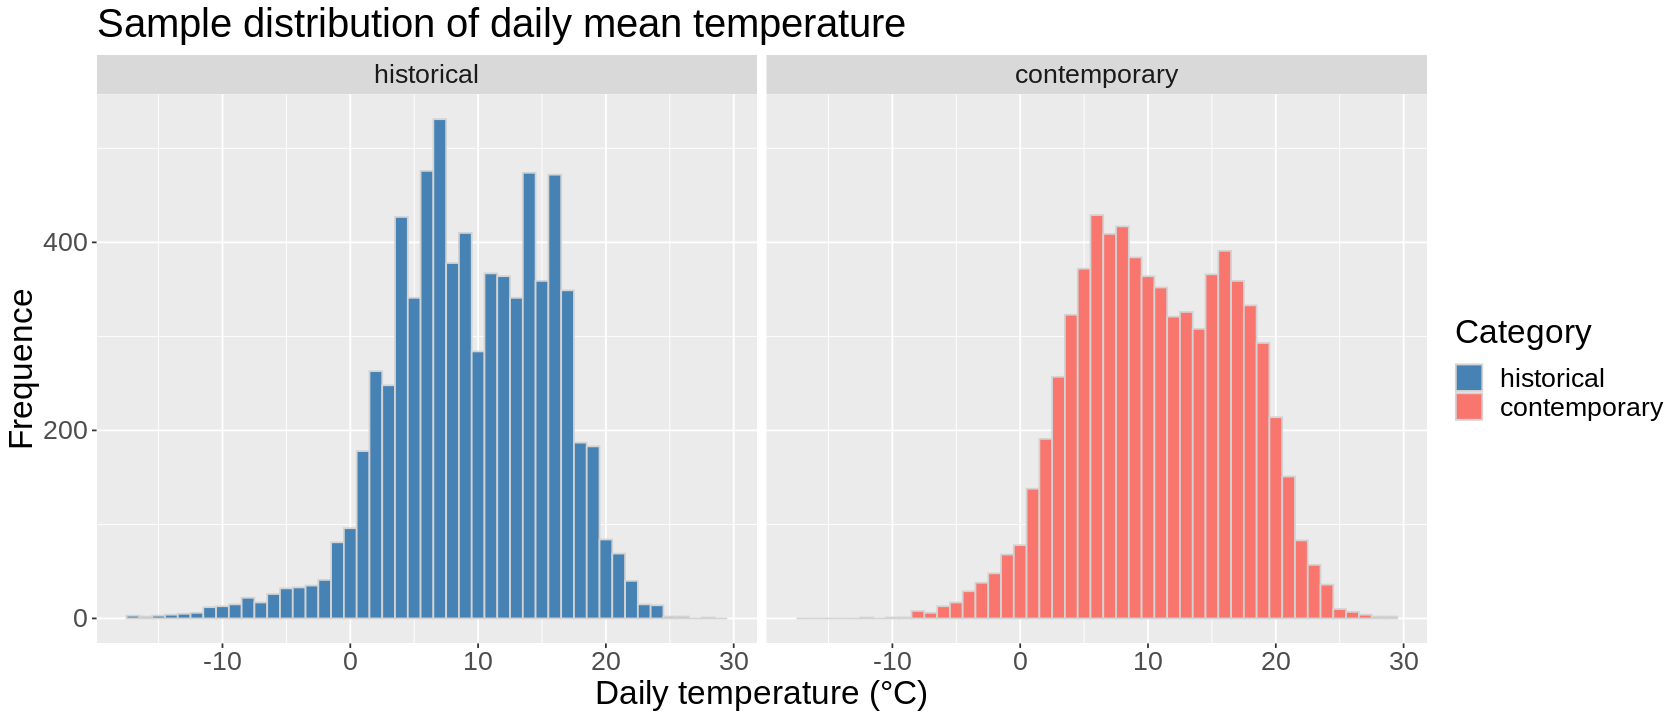

In [81]:
options(repr.plot.width = 14, repr.plot.height = 6)

station_temp_sample_distribution <- station_temp %>%
    ggplot(aes(x = Mean_Temp, fill = Category, color = "grey")) +
    geom_histogram(binwidth = 1, color = "lightgrey") +
    facet_grid(. ~ Category) +
    scale_fill_manual(values = c("#4682B4", "#F8766D")) +
    labs(x = "Daily temperature (°C)", y = "Frequence") +
    ggtitle("Sample distribution of daily mean temperature") +
    theme(text = element_text(size = 20))
station_temp_sample_distribution   

*Figure 2. Sample distribution of daily mean temperature at Abbotsford A weather station.*

### Temperature - Bootstrap Simulation

Our initial hypothesis testing is conducted using simulation based permutation with the `infer` package. We first calculated the observed test statistic, then generated a simulation from the null distribution. We further obtained the P-value. The following codes demonstrate the steps:

Warning message:
“Please be cautious in reporting a p-value of 0. This result is an approximation based on the number of `reps` chosen in the `generate()` step. See `?get_p_value()` for more information.”


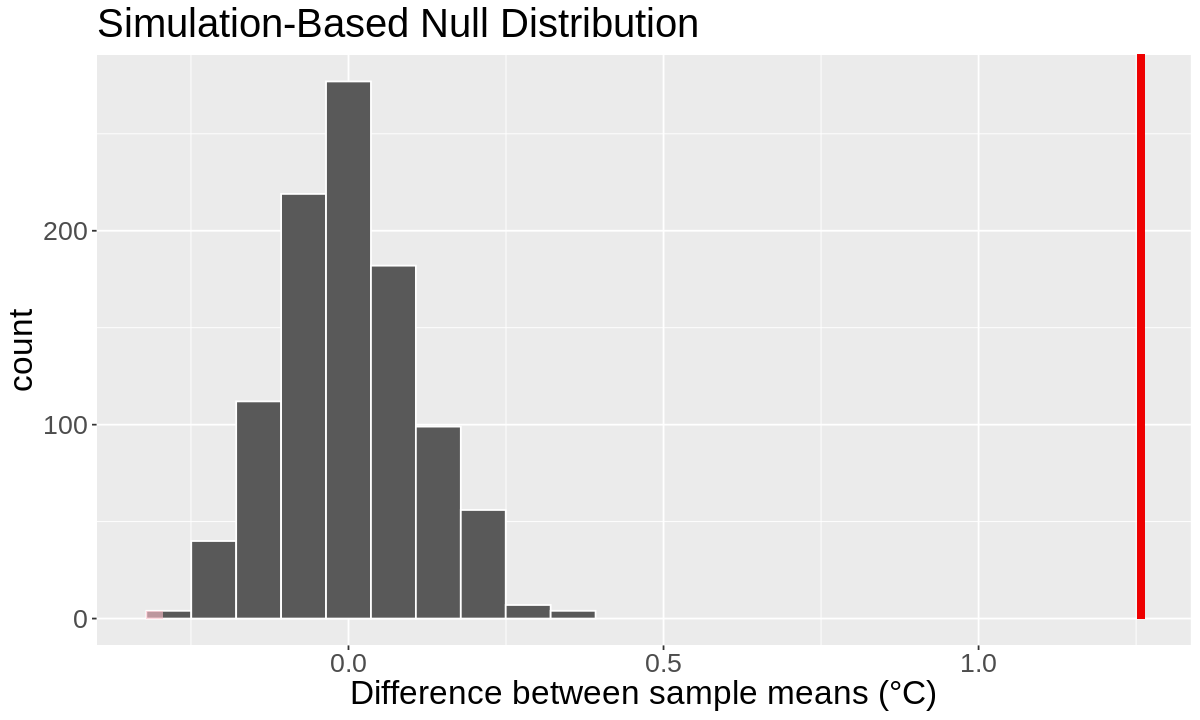

In [13]:
set.seed(100)
options(repr.plot.width = 10, repr.plot.height = 6)

obs_diff_in_temp <- station_temp %>%
    specify(formula = Mean_Temp ~ Category) %>%
    calculate(stat = "diff in means", order = c("contemporary", "historical"))

null_diff_in_temp <- station_temp %>%
    specify(formula = Mean_Temp ~ Category) %>%
    hypothesize(null = "independence") %>%
    generate(reps = 1000, type = "permute") %>%
    calculate(stat = "diff in means", order = c("contemporary", "historical"))

diff_in_temp_plot <- null_diff_in_temp %>%
    visualize(bins = 10) +
    shade_p_value(obs_stat = obs_diff_in_temp, direction = "both") +
    xlab("Difference between sample means (°C)") +
    theme(text = element_text(size = 20))
diff_in_temp_plot

p_value <- null_diff_in_temp %>%
    get_p_value(obs_stat = obs_diff_in_temp, direction = "both")

*Figure n. Figure of simulation distribution and P-value of daily temperature hypothesis test.*

Notice that the red line in above graph indicates the observed difference in temperature, which is far out of the range of values generated by simulation under null hypothesis, suggesting that null hypothesis might possibly be rejected. To further prove this, we notice that the simulation returned a p-value of 0; however, we should never report a p-value of 0 because this suggests that making a Type I error is impossible. Since we used 1000 reps to calculate the sample, we conclude:  
>**The p-value is < 0.001, we reject the null hypothesis $H_0^1$ in favor of $H_A^1$ at the 5% significant level.**

We further computed the confidence interval of this observed test statistic with a 95% confidence interval using bootstrap method. 

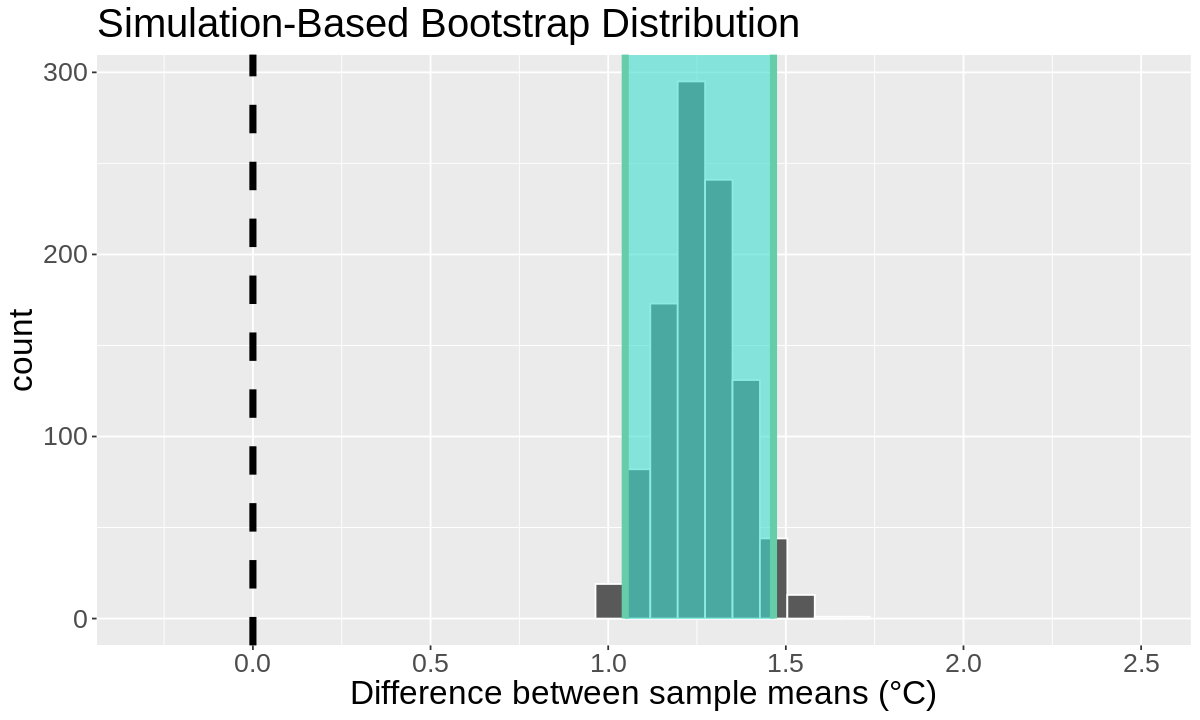

In [12]:
options(repr.plot.width = 10, repr.plot.height = 6)
set.seed(100)
diff_in_temp_bootstrap_dist <- station_temp %>%
    specify(formula = Mean_Temp ~ Category) %>%
    generate(reps = 1000, type = "bootstrap") %>%
    calculate(stat = "diff in means", order = c("contemporary", "historical"))

diff_in_temp_ci <- 
     diff_in_temp_bootstrap_dist %>% 
     get_confidence_interval(level = 0.95, type = "percentile")

diff_in_temp_ci_plot <- diff_in_temp_bootstrap_dist %>%
    visualize(bins = 10) +
    shade_ci(diff_in_temp_ci) +
    xlab("Difference between sample means (°C)") +
    scale_x_continuous(limits = c(-0.3, 2.5)) +
    geom_vline(xintercept = 0, size = 2, linetype = "dashed") +
    theme(text = element_text(size = 20))
diff_in_temp_ci_plot
# obs_diff_in_temp
# diff_in_temp_ci

*Figure n. Figure of simulated bootstrap distribution of confidence interval of sample statistic.*

Notice that the value 0 is not included in our confidence interval, again suggesting that $\mu_{ct}$ and $\mu_{ht}$ are truly different.  

Table n summarizes the value we obtained for this test statistic.  95% confidence interval. 

| Test Statistic    | Observed Test Statistic |  p-value | Lower CI  |  Upper CI
| :----------: | :----------: | :----------: |:----------:| :---------:|
| $\bar{x}_{ct} - \bar{x}_{ht}$  |1.258 | <0.001|1.048|1.465|

<center><i>Table n. Table of the estimates for test statistic difference in mean temperature.</i>

### Temperature - Asymptotic Two Samples T-Test
We further investigate the difference between mean temperature using the asymptotic method. 

In [99]:
temp_contemporary <- station_temp %>%
    filter(Category == "contemporary")

temp_historical <- station_temp %>%
    filter(Category == "historical")

temp_t_test <- tidy(
    t.test(temp_contemporary$Mean_Temp, temp_historical$Mean_Temp, alternative = "two.sided"))
# temp_t_test

estimate,estimate1,estimate2,statistic,p.value,parameter,conf.low,conf.high,method,alternative
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
1.257977,10.78897,9.530992,12.12236,1.169597e-33,14504.43,1.054568,1.461385,Welch Two Sample t-test,two.sided


We can see that the estimates of the difference in mean temperature between historical and contemporary data obtained from two sample t-test is very similar with the result we get from bootstrap simulation. The 95% confidence interval for the observed test statistic does not include 0 as well. 

| Test Statistic    | Observed Test Statistic |  p-value | Lower CI  |  Upper CI
| :----------: | :----------: | :----------: |:----------:| :---------:|
|  $\bar{x}_{ct} - \bar{x}_{ht}$  |1.258 | <0.001|1.055|1.461|

<center><i>Table 4. Table of the estimates obtained from t-test for difference in mean temperature.</i>

Looking at the 95% confidence interval and the p-value for the observed test statistic from both bootstrap and t-test, there is enough evidence to conclude that the difference between historical and contemporary temperature is not zero. We further demonstrate the parameter difference in two categories.

### Temperature - Bootstrapping Simulation for Point Estimates

From our hypothesis testing, we conclude that there is a difference between the two group's mean temperature. Now we are looking at the distribution of each group and we aim to explore how much they different by.  
We use a bootstrap distribution to estimate the standard error in the point estimate and generated a 95% confidence interval for each point estimate. 

In [82]:
options(repr.plot.width = 12, repr.plot.height = 5)
set.seed(100)

temp_historical_mean <- temp_historical %>%
    summarize(mean = mean(Mean_Temp)) %>%
    pull()

temp_historical_bootstrap <- temp_historical %>%
    specify(response = Mean_Temp) %>%
    generate(reps = 1000, type = "bootstrap") %>%
    calculate(stat = "mean")

temp_historical_percentile_ci <- temp_historical_bootstrap %>%
    get_ci(level = 0.95, type = "percentile")

temp_historical_percentile_ci_plot <- temp_historical_bootstrap %>%
    visualize(binwidth = 0.05) +
    shade_ci(endpoints = temp_historical_percentile_ci, fill = "#4682B4", color = "#4682B4") +
    labs(title = "", x = "Sample mean of historical daily temperature (°C)") +
    geom_vline(xintercept = temp_historical_mean, size = 2, linetype = "dashed") +
    scale_x_continuous(limits = c(9, 11)) +
    theme(text = element_text(size = 20))

Warning message:
“Removed 2 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 2 rows containing missing values (geom_bar).”


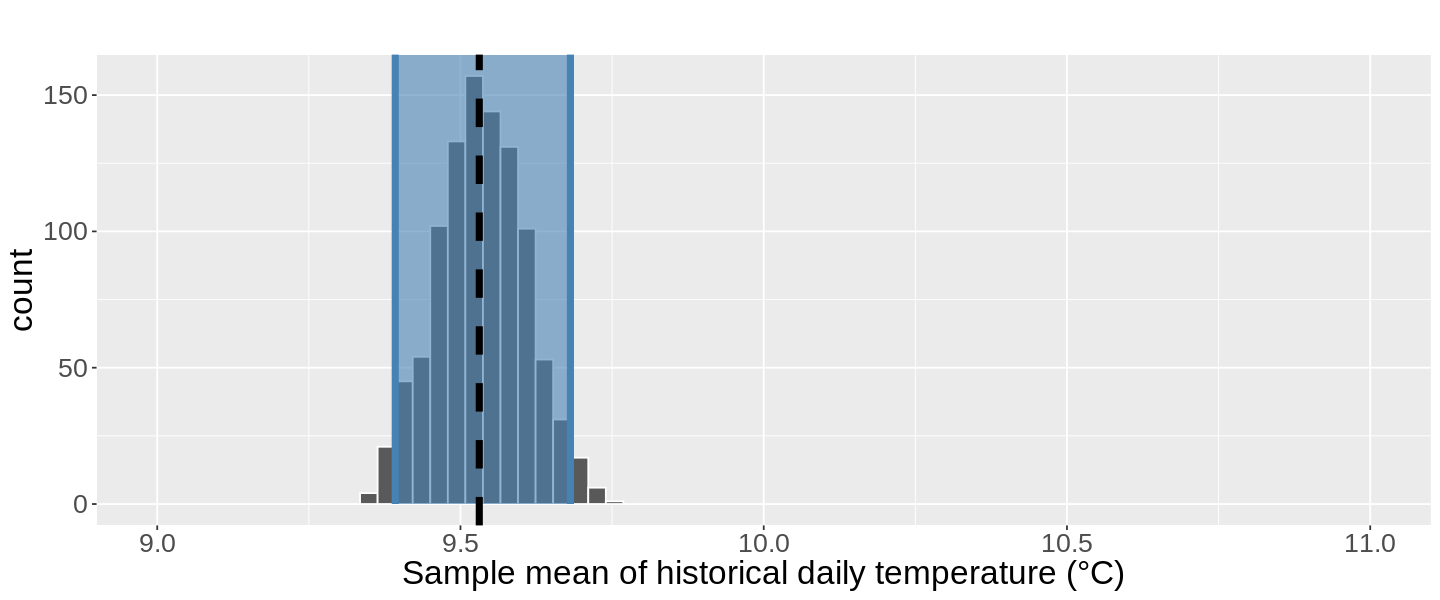

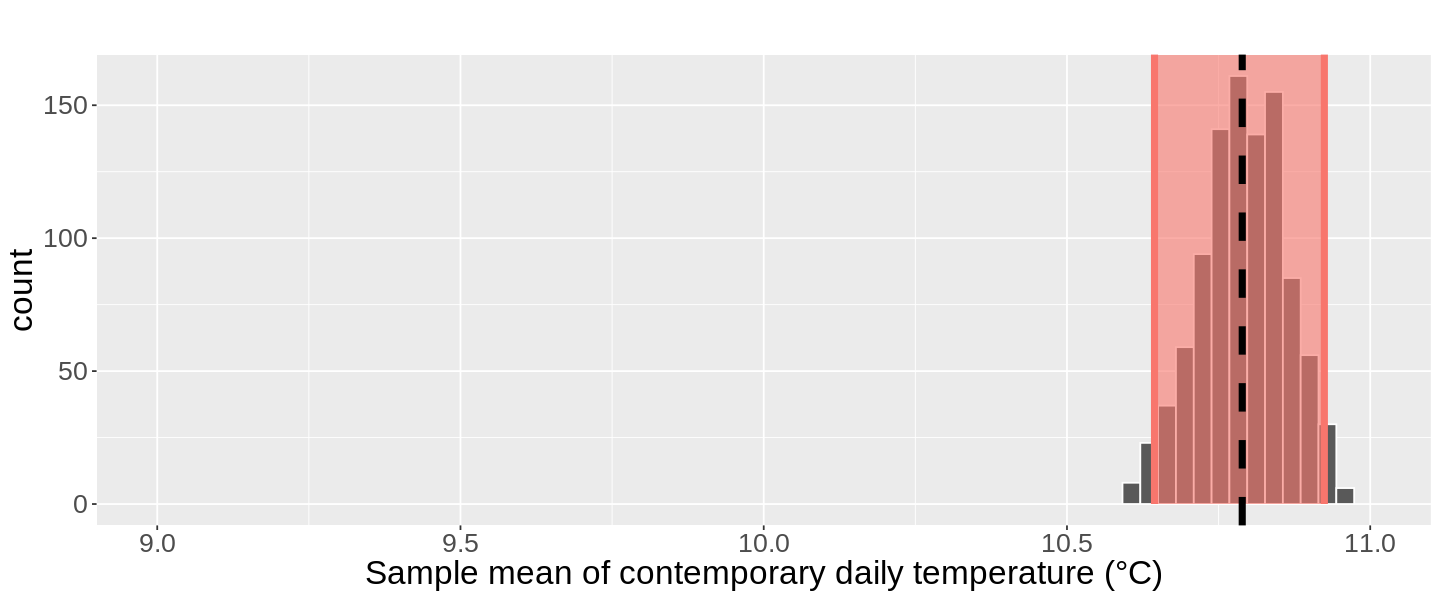

In [83]:
set.seed(100)
options(repr.plot.width = 12, repr.plot.height = 5)

temp_contemporary_mean <- temp_contemporary %>%
    summarize(mean = mean(Mean_Temp)) %>%
    pull()

temp_contemporary_bootstrap <- temp_contemporary %>%
    specify(response = Mean_Temp) %>%
    generate(reps = 1000, type = "bootstrap") %>%
    calculate(stat = "mean")

temp_contemporary_percentile_ci <- temp_contemporary_bootstrap %>%
    get_ci(level = 0.95, type = "percentile")

temp_contemporary_percentile_ci_plot <- temp_contemporary_bootstrap %>%
    visualize(binwidth = 0.05) +
    shade_ci(endpoints = temp_contemporary_percentile_ci, fill = "#F8766D", color = "#F8766D") +
    labs(title = "", x = "Sample mean of contemporary daily temperature (°C)") +
    geom_vline(xintercept = temp_contemporary_mean, size = 2, linetype = "dashed") +
    scale_x_continuous(limits = c(9, 11)) +
    theme(text = element_text(size = 20))

temp_historical_percentile_ci_plot
temp_contemporary_percentile_ci_plot


*Figure n. Bootstrap distribution of the sample means with 95% confidence interval.*

Table n summarizes the point estimate for each category and reports their 95% confidence interval. 

| Category    | Point Estimate $\bar{x}$  |  Lower CI  |  Upper CI
| :----------: | :----------: | :----------: |:----------:|
| historical|9.53|9.39|9.68
| contemporary|10.79|10.64|10.92

<center><i>Table n. Table of the estimates for daily mean temperature.</i>    

And we interpret this as:
- If we repeated our sampling procedure a large number of times, we expect about 95% of the confidence intervals [9.39, 9.68] to capture the value of the population parameter $\mu$ - the mean of daily temperature from 1950 to 1969.  
- If we repeated our sampling procedure a large number of times, we expect about 95% of the confidence intervals [10.64, 10.92] to capture the value of the population parameter $\mu$ - the mean of daily temperature from 2000 to 2019. 

## Precipitation

The United Nations (n.d.-a) states that due to climate change destructive storms have become more intense and more frequent in many regions. As temperatures rise, more moisture evaporates, which exacerbates extreme rainfall and flooding, causing more destructive storms. Can we see this claimed difference in yearly extreme rainfall between historical and contemporary data at Abbotsford A weather station? We first subset the `Total_Rain` to obtain the highest yearly rainfall. The hypothesis we will be testing here is:  
  
$$H_0^{2}: \mu_{cr} - \mu_{hr} = 0$$  
  
$$H_A^{2}: \mu_{cr} - \mu_{hr} \neq 0$$  

We generated a box plot and its sample distribution to visualize the sample. 

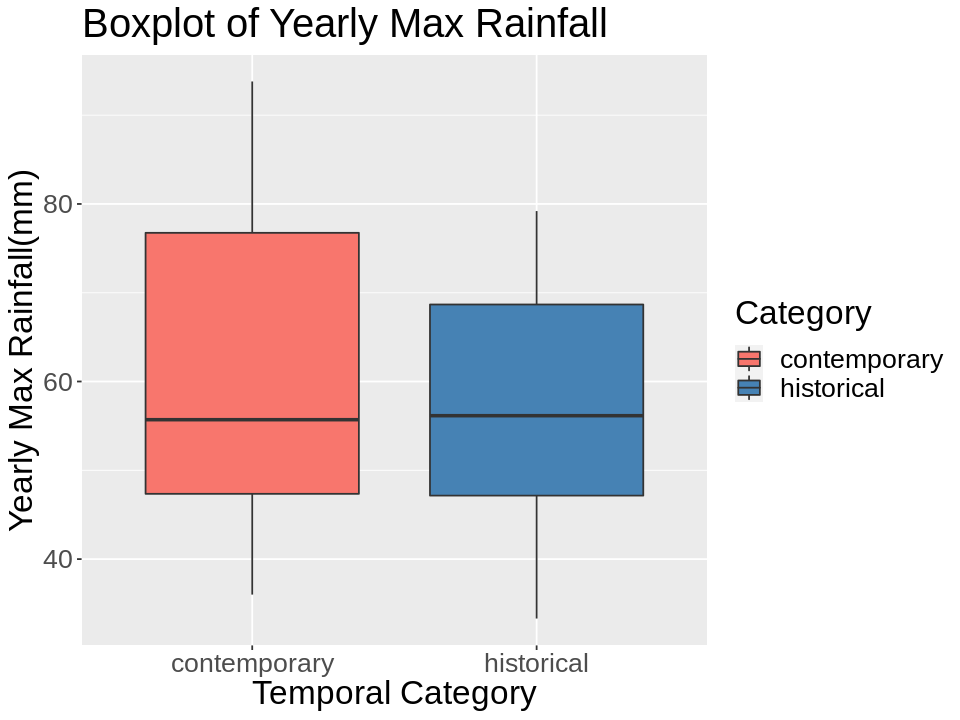

In [92]:
options(repr.plot.width = 8, repr.plot.height = 6)

station_rain <- climate_sample %>%
    select(Year, Total_Rain)
 
#station_rain

station_rain_yearly_max <- station_rain %>%
   group_by(Year) %>%
   summarize(max_rain = max(Total_Rain)) %>%
   mutate(Category = as.factor(
       case_when(Year %in% c(2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019) ~ "contemporary",
                 Year %in% c(1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969) ~ "historical")))

#station_rain_yearly_max 

rain_boxplot <- station_rain_yearly_max %>%
    ggplot(aes(x = Category, y = max_rain, fill = Category)) +
    geom_boxplot() +
    scale_fill_manual(values = c("#F8766D", "#4682B4")) +
    labs(x = "Temporal Category", y = "Yearly Max Rainfall(mm)") +
    ggtitle("Boxplot of Yearly Max Rainfall") +
    theme(text = element_text(size = 20))
rain_boxplot


*Figure n.*

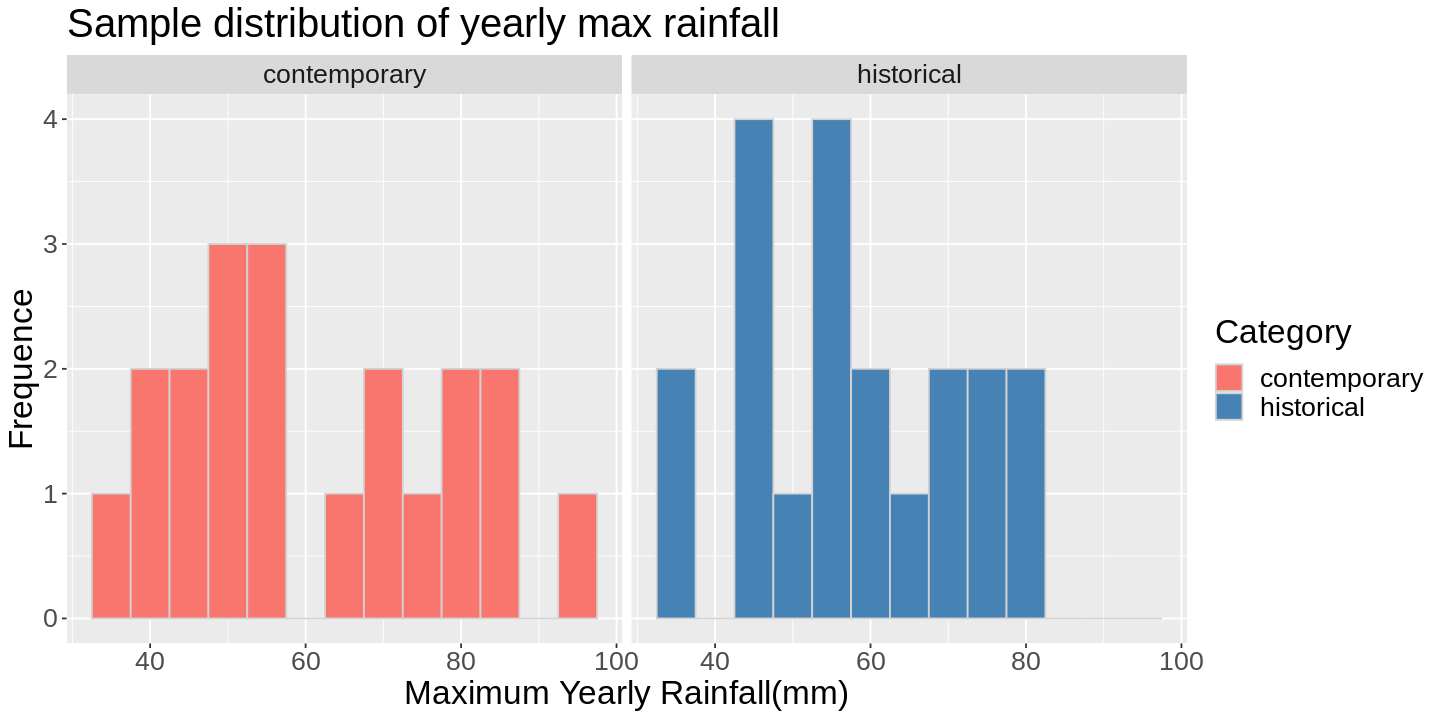

In [94]:
options(repr.plot.width = 12, repr.plot.height = 6)

station_temp_sample_distribution <- station_rain_yearly_max %>%
    ggplot(aes(x = max_rain, fill = Category)) +
    geom_histogram(binwidth = 5, color = "lightgrey") +
    facet_grid(. ~ Category) +
    scale_fill_manual(values = c("#F8766D", "#4682B4")) +
    labs(x = "Maximum Yearly Rainfall(mm)", y = "Frequence") +
    ggtitle("Sample distribution of yearly max rainfall") +
    theme(text = element_text(size = 20))

station_temp_sample_distribution   

*Figure n*

It seems that rainfall data are actually similar in between two groups, but our sample size is quite small. We need to increase the number of replication in the simulation method. 
### Extreme Rainfall - Bootstrap Simulation

We first test by simulation. We calculated the observed test statistic, then generated a simulation from the null distribution. We further obtained the P-value. The following codes demonstrate the steps:

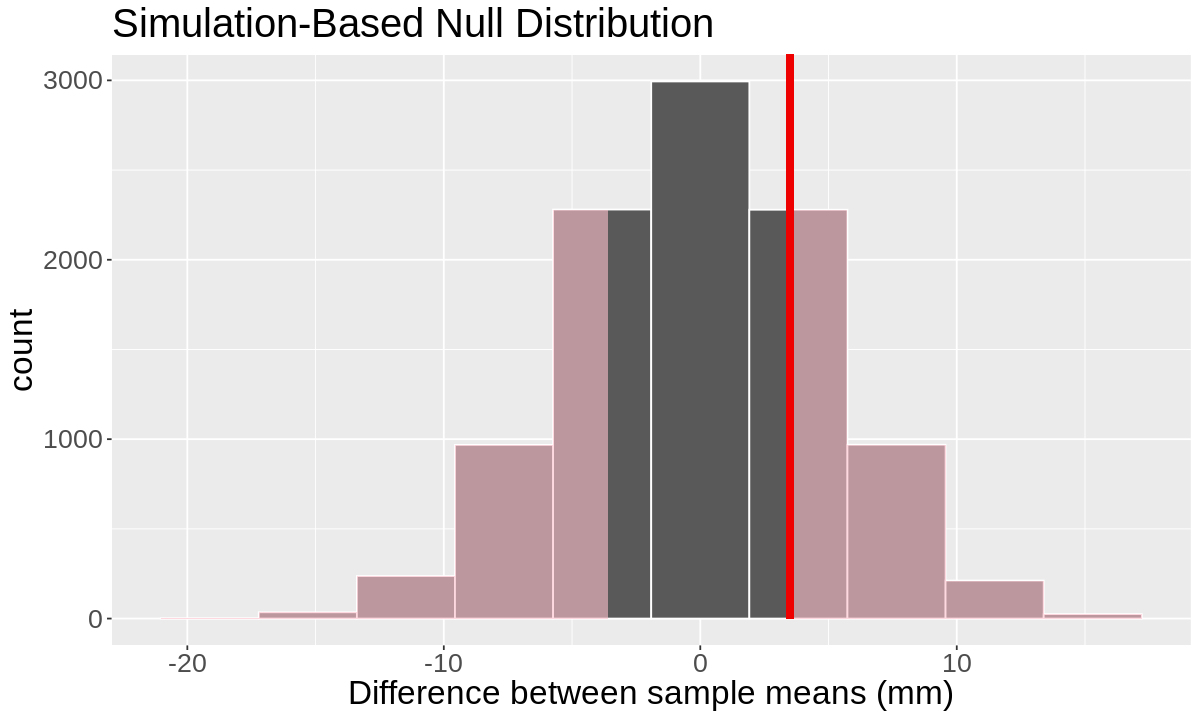

In [95]:
set.seed(100)
options(repr.plot.width = 10, repr.plot.height = 6)

obs_diff_in_rainfall <- station_rain_yearly_max %>%
    specify(formula = max_rain ~ Category) %>%
    calculate(stat = "diff in means", order = c("contemporary", "historical"))

null_diff_in_rainfall <- station_rain_yearly_max %>%
    specify(formula = max_rain ~ Category) %>%
    hypothesize(null = "independence") %>%
    generate(reps = 10000, type = "permute") %>%
    calculate(stat = "diff in means", order = c("contemporary", "historical"))

diff_in_rainfall_plot <- null_diff_in_rainfall %>%
    visualize(bins = 10) +
    shade_p_value(obs_stat = obs_diff_in_rainfall, direction = "both") +
    xlab("Difference between sample means (mm)") +
    theme(text = element_text(size = 20))
diff_in_rainfall_plot

p_value <- null_diff_in_rainfall %>%
    get_p_value(obs_stat = obs_diff_in_rainfall, direction = "both")
# p_value

# a p_value of 0.474, we do not reject the null hypothesis 

*Figure*

we do not reject null.  
We further computed the confidence interval of this test statistic with a 95% confidence interval.

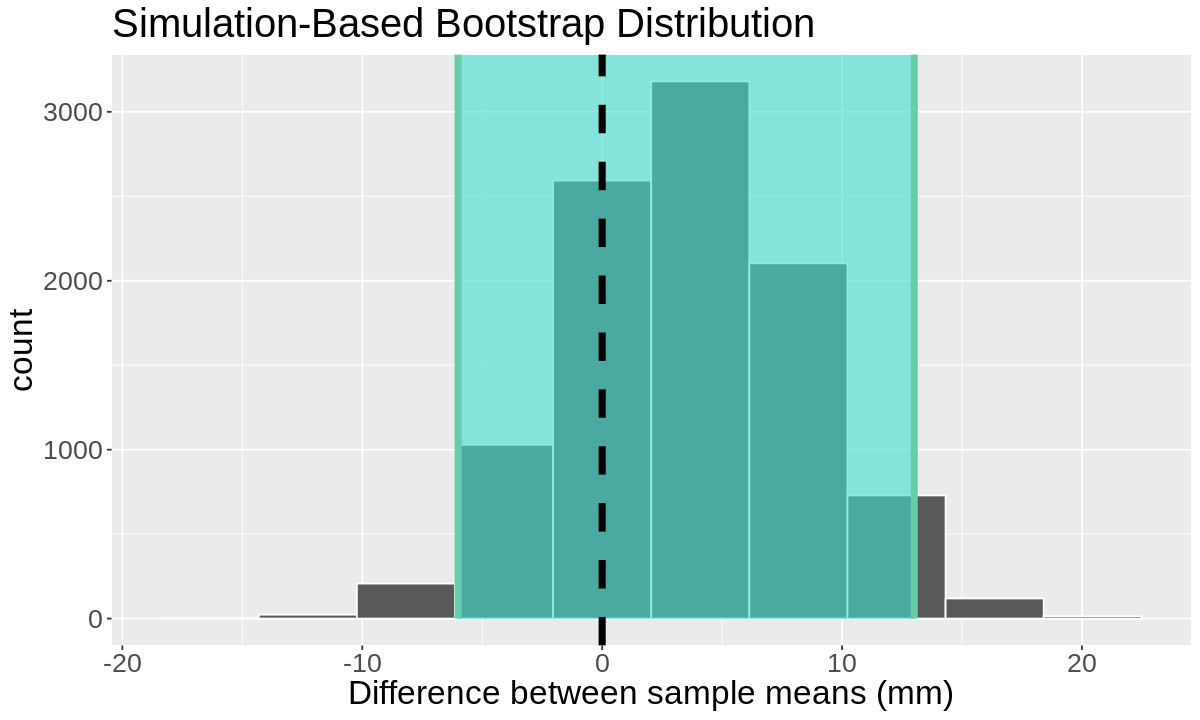

In [96]:
options(repr.plot.width = 10, repr.plot.height = 6)
set.seed(100)

diff_in_rainfall_bootstrap_dist <- station_rain_yearly_max %>%
    specify(formula = max_rain ~ Category) %>%
    generate(reps = 10000, type = "bootstrap") %>%
    calculate(stat = "diff in means", order = c("contemporary", "historical"))

diff_in_rainfall_ci <- 
     diff_in_rainfall_bootstrap_dist %>% 
     get_confidence_interval(level = 0.95, type = "percentile")

diff_in_rainfall_ci_plot <- diff_in_rainfall_bootstrap_dist %>%
    visualize(bins = 10) +
    shade_ci(diff_in_rainfall_ci) +
    xlab("Difference between sample means (mm)") +
    geom_vline(xintercept = 0, size = 2, linetype = "dashed") +
    theme(text = element_text(size = 20))
diff_in_rainfall_ci_plot 


# diff_in_rainfall_ci

*Figure*

Notice that the value 0 **is** included in our confidence interval, suggesting that there is no significant difference between $\mu_{cr}$ and $\mu_{hr}$. 

Table **n** summarizes the value we obtained for this test statistic.  95% confidence interval. 

| Test Statistic    | Observed Test Statistic |  p-value | Lower CI  |  Upper CI
| :----------: | :----------: | :----------: |:----------:| :---------:|
| $\bar{x}_{cr} - \bar{x}_{hr}$  |3.505 | 0.474 |-6.005|13.008|

<center><i>Table n. Table of the estimates for test statistic difference in yearly max rainfall.</i>

### Extreme Rainfall - Asymptotic Two Samples T-Test
We further investigate the difference between the mean of maximum yearly rainfall using the asymptotic method. 

In [98]:
rain_contemporary <- station_rain_yearly_max %>%
    filter(Category == "contemporary") %>%
    pull(max_rain)
rain_historical <- station_rain_yearly_max %>%
    filter(Category == "historical")%>%
    pull(max_rain)

Max_rain_t_test <- tidy(t.test(x = rain_contemporary, y = rain_historical, alternative = "two.sided"))
# Max_rain_t_test


| Test Statistic    | Observed Test Statistic |  p-value | Lower CI  |  Upper CI
| :----------: | :----------: | :----------: |:----------:| :---------:|
| $\bar{x}_{cr} - \bar{x}_{hr}$|3.505 | 0.481 |-6.485|13.495|
<center><i>Table n. Table of the estimates for test statistic difference in yearly max rainfall.</i>

In [ ]:
Here, we have confirmed that we do not have enough evidence to reject the null

## Results
In the first part of this report, we tested the:  
**Null Hypothesis**: The difference in population mean of the contemporary daily mean temperature and the historical daily mean temperature is the same.  $H_0^{1}: \mu_{ct} - \mu_{ht} = 0$  
**Alternative Hypothesis**: The difference in population mean of the contemporary daily mean temperature and the historical daily mean temperature is not the same. $H_A^{1}: \mu_{ct} - \mu_{ht} \neq 0$  
  
Table n summarize the p-value and the 95% confidence interval results by simulation and asymptotic for the temperature variable. 

| Test Statistic    | Observed Test Statistic |Method  | p-value | Lower CI  |  Upper CI
| :----------: | :----------: | :----------: |:----------:| :---------:| :---------:
| $\bar{x}_{ct} - \bar{x}_{ht}$ | 1.258 |Simulation|<0.001|1.048|1.465|
|  $\bar{x}_{ct} - \bar{x}_{ht}$ | 1.258 |Asymptotic |<0.001|1.055|1.461|

<center><i>Table n. Table of the estimates obtained from t-test for difference in mean temperature.</i>  

We conclude: 
>**The p-value is < 0.001, we reject the null hypothesis $H_0^1$ in favor of $H_A^1$ at the 5% significant level.**
  
    
In the second part of this report, we tested the:  
**Null Hypothesis**: The difference in population mean of the contemporary maximum yearly rainfall and the historical maximum yearly rainfall is the same. $H_0^{2}: \mu_{cr} - \mu_{hr} = 0$   
**Alternative Hypothesis**: The difference in population mean of the contemporary maximum yearly rainfall and the historical maximum yearly rainfall is not the same. $H_A^{2}: \mu_{cr} - \mu_{hr} \neq 0$

Table n summarize the p-value and the 95% confidence interval results by simulation and asymptotic for the temperature variable. 

| Test Statistic    | Observed Test Statistic |Method  | p-value | Lower CI  |  Upper CI
| :----------: | :----------: | :----------: |:----------:| :---------:| :---------:
| $\bar{x}_{cr} - \bar{x}_{hr}$  |3.505 | Simulation | 0.474 |-6.005|13.008|
|  $\bar{x}_{ct} - \bar{x}_{ht}$ | 1.258 |Asymptotic | 0.481 |-6.485|13.495|

<center><i>Table n. Table of the estimates obtained from t-test for difference in mean temperature.</i> 


we conclude: 
> here:

---
This study wishes to verify the claim of climate change effect from our weather record sample. Moving forward, the group intends to perform a similar analysis on precipitation data. At the first glance, we noticed that the majority of the values in the precipitation variable are zero, which brings the point estimate of the sample mean to a minimal level (close to zero) for both historical and contemporary categories. How to better utilize this dataset will be the next task the group plans to focus on. The group also plans to investigate the asymptotic method as a comparison to the simulation-based method for all the estimates.

This study serves as an empirical analysis of climate change for the Abbotsford region and may impact how the municipalities plan to adjust their local agriculture industry facing the rising temperature and drought situation in the future.

Can our study be generalized to a broader population outside of the Abbotsford region? What other dataset do we need to include for such generalization to be valid and meaningful? These are the questions for future studies to focus on.

Do you think one of bootstrapping or asymptotics is more appropriate than the other? Why or why not? Explain why you think both methods gave you similar/different results, and whether you think one is more trustworthy than the other.

## Discussion
 
Summarize what you found, and the implications/impact of your findings.

According to the preliminary data visualization, we found out that there is a difference in mean temperature between historical and contemporary data sets. However, the medians were similar for yearly max precipitation although there were more extreme values in the contemporary data sets. We then performed hypothesis testing accordingly with a significance value of 0.05. Both simulation-based bootstrap and asymptotic t-test showed a similar result. 
We conclude that there is sufficient evidence that the true population parameter is significantly different from the specified value in which the observed test statistic of 1.258 showed that there is a rise in mean temperature. It may be a shred of evidence to support the statement that the climate is changing.

If relevant, discuss whether your results were what you expected to find.

The results align with our hypothesis that there is a difference in temperature. Blabla let me think think. 

Discuss future questions/research this study could lead to.

We would like to examine whether other stations may show similar/different results. There are many factors other than temperature and precipitation that may be interesting to observe climate change.


ERROR: Error in eval(expr, envir, enclos): object 'station_rain' not found


## Reference
  
Historical Data. (2021, November 25), Government of Canada, weather, climate and hazards. https://climate.weather.gc.ca/historical_data/search_historic_data_e.html  
  
United Nations. (n.d.-a), Causes and effects of climate change. https://www.un.org/en/climatechange/science/causes-effects-climate-change


United Nations. (n.d.-b), What is climate change? https://www.un.org/en/climatechange/what-is-climate-change

